## 00. 프로젝트 목적

- 본 프로젝트는 Adaptive RAG를 위한 프로젝트입니다.

-  프로젝트 설명

- 고교학점제 전용 챗봇이라는 큰 틀을 먼저 잡고, 그 아래 세부 카테고리를 재정의
    - 운영 문의: 제도, 졸업 요건, 교과 이수 기준 등
    - 과목 선택: 계열/진로 관련 과목, 이수 단위 관련 질문
    - 입시 연계: 대입, 학과, 진학에 유리한 과목 조합 등
    - 도서/자료 추천: 진로에 맞는 책이나 자료
    - 서비스 이용 문의: 챗봇 사용법, 시스템 오류 등

### 필요한 환경변수 정의

In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv
import os

# API 키 정보 로드
load_dotenv()

# API 키 읽어오기
openai_api_key = os.environ.get('OPENAI_API_KEY')
pinecone_api_key = os.environ.get("PINECONE_API_KEY")

## 01. Tool 정의

In [2]:
from langchain_pinecone import PineconeVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document
from langchain_community.tools import TavilySearchResults
from langchain_core.tools import tool
from typing import List

c:\Users\82106\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# OpenAI 임베딩 인스턴스 생성
embeddings = OpenAIEmbeddings(
    model='text-embedding-3-large',
    openai_api_key=openai_api_key
)

In [4]:
# 운영 문의 정보 검색
pinecone_policy = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="policy", # 네임스페이스 설정 : 운영 문의 -> policy
)

# 운영 정보 검색 tool 정의
@tool
def search_policy(query: str) -> List[Document]:
    """
    Securely search and access operational information related to the High School Credit System,
    including graduation requirements, academic regulations, subject completion standards, and general policy guidelines.

    To maintain data integrity and clarity, use this tool only for questions about system operations of the High School Credit System,
    such as curriculum rules, credit units, or graduation criteria.
    """
    docs = pinecone_policy.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [5]:
# 과목 정보 검색
pinecone_subject = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="subject", # 네임스페이스 설정: 과목 문의 -> subject
)

# 과목 점보 검색 tool 정의
@tool
def search_subject(query: str) -> List[Document]:
    """
    Securely search and access information about subject within the High School Credit System,  
    including subject descriptions, learning objectives, curriculum content, and their relevance to specific career paths.

    To ensure appropriate guidance, use this tool only for questions related to subject within the High School Credit System
    """
    docs = pinecone_subject.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [6]:
# 입시 정보 검색
pinecone_admission = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="admission", # 네임스페이스 설정: 과목 문의 -> subject
)

# 입시 점보 검색 tool 정의
@tool
def search_admission(query: str) -> List[Document]:
    """
    Securely search and access information related to college admissions in the context of the High School Credit System,  
    including university overviews, academic majors, academic tracks (계열), and admission procedures.

    To maintain clarity and relevance, use this tool only for questions about college and major selection,  
    such as introductions to specific universities, departments, or entrance examination methods.
    """

    docs = pinecone_admission.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [7]:
# 도서 정보 검색
pinecone_book = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="book", # 네임스페이스 설정: 과목 문의 -> subject
)

# 도서 추천 검색 tool 정의
@tool
def search_book(query: str) -> List[Document]:
    """
    Search and access book recommendations tailored to specific majors or academic tracks,  
    along with brief summaries for each recommended title.

    Use this tool only for questions about books related to a student’s interests or field of study.
    """

    docs = pinecone_book.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [8]:
# 서비스 관련 정보 검색
pinecone_service = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="service", # 네임스페이스 설정: 고교학점제 -> curriculum, 진로&진학 상담 -> course, 서비스 문의 -> service
)

# 서비스 검색
@tool
def search_service(query: str) -> List[str]:
    """
    Securely search and access service-related information for the Myfolio service-related information,  
    including how to use the chatbot and how to resolve issues related to the Myfolio service.

    Use this tool only for service-related queries, such as usage instructions or customer support requests.
    """

    docs = pinecone_service.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [9]:
# 도구 목록을 정의 
tools = [search_policy, search_subject, search_admission, search_book, search_service]

In [10]:
# 너의 툴 이름과 함수 맵핑
tool_map = {
    "search_policy": search_policy,
    "search_subject": search_subject,
    "search_admission": search_admission,
    "search_book": search_book,
    "search_service": search_service,
}

def run_tool_and_get_output(question: str) -> dict:
    # 툴 선택 (output은 안 나옴)
    result = question_router.invoke({"question": question})
    tool_name = result.tool

    # 툴 실행 (직접 실행해야 함)
    if tool_name in tool_map:
        output = tool_map[tool_name](question)  # 여기에 실제 검색 결과가 담김
    else:
        output = None

    return {
        "tool": tool_name,
        "output": output
    }

In [11]:
from langchain_openai import ChatOpenAI
from pprint import pprint

# 기본 LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, streaming=True)

# LLM에 도구 바인딩하여 추가 
llm_with_tools = llm.bind_tools(tools)

In [12]:
# 메뉴 검색에 관련된 질문을 하는 경우 -> 메뉴 검색 도구를 호출  
query = "고교학점제 졸업요건에 대해 설명해줘"
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_L0EUU8tvEY4wcL8uN0uaNbXo', 'function': {'arguments': '{"query":"고교학점제 졸업요건"}', 'name': 'search_policy'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_92e0377081'}, id='run--698bd398-6fc3-4bbd-a2b9-8304c3116132-0', tool_calls=[{'name': 'search_policy', 'args': {'query': '고교학점제 졸업요건'}, 'id': 'call_L0EUU8tvEY4wcL8uN0uaNbXo', 'type': 'tool_call'}])
----------------------------------------------------------------------------------------------------
''
----------------------------------------------------------------------------------------------------
[{'args': {'query': '고교학점제 졸업요건'},
  'id': 'call_L0EUU8tvEY4wcL8uN0uaNbXo',
  'name': 'search_policy',
  'type': 'tool_call'}]
----------------------------------------------------------------------------------------------------


## 02. State 정의

In [13]:
from typing import TypedDict, List
from langchain_core.documents import Document

# 상태 Schema 정의 
class AdaptiveRagState(TypedDict):
    question: str
    documents: List[Document]
    generation: str

## 03. 질문 분석 후 라우팅

In [14]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field
from textwrap import dedent

# 라우팅 결정용 데이터 모델
class ToolSelector(BaseModel):
    """Routes the user question to the most appropriate tool."""
    tool: Literal[
        "search_policy", 
        "search_subject", 
        "search_admission", 
        "search_book", 
        "search_service"
    ] = Field(
        description="Select one of the tools: search_policy, search_subject, search_admission, search_books, or search_service based on the user's question."
    )

# 구조화된 출력을 위한 LLM 설정
structured_llm = llm.with_structured_output(ToolSelector)

# 라우팅을 위한 프롬프트 템플릿
system = dedent("""You are a high school curriculum chatbot that classifies user questions into one of five categories.

Use the following routing rules:
- For questions about 고교학점제 운영, graduation requirements, or subject completion standards, use the **search_policy** tool.
- For questions about 과목 정보, 학습 내용, or recommended subjects for careers, use the **search_subject** tool.
- For questions about 대학/전공/계열 소개 or 입학 전형, use the **search_admission** tool.
- For questions requesting 전공/계열 관련 도서 추천 or brief summaries of specific books, use the **search_book** tool.
- For questions about how to use the chatbot or MyPolio service issues, use the **search_service** tool.

Always select the most appropriate tool based on the user's intent.
""")

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

# 질문 라우터 정의
question_router = route_prompt | structured_llm

# 테스트 실행
print(question_router.invoke({"question": "고교학점제 졸업 요건에 대해 설명해줘"}))
print(question_router.invoke({"question": "경영학과 가고 싶은데, 어떤 과목을 들어야 하나요?"}))
print(question_router.invoke({"question": "서울대학교 경영학과에 대해 알려줘."}))
print(question_router.invoke({"question": "경영학과에 도움되는 도서 추천해줘."}))
print(question_router.invoke({"question": "베어러블의 세특 추천 서비스 이용 방법이 궁금해요."}))

tool='search_policy'
tool='search_subject'
tool='search_admission'
tool='search_book'
tool='search_service'


In [15]:
def route_question_adaptive(state: AdaptiveRagState) -> Literal[
    "search_policy", "search_subject", "search_admission", "search_book", "search_service", "llm_fallback"
]:
    question = state["question"]
    try:
        result = run_tool_and_get_output(question)
        datasource = result["tool"]
        output = result["output"]

        # output이 문서 리스트고, 전부 '관련 정보를 찾을 수 없습니다'이면 fallback
        if isinstance(output, list):
            all_pages = [doc.page_content for doc in output]
            if all("관련 정보를 찾을 수 없습니다" in page for page in all_pages):
                return "llm_fallback"

        return datasource if datasource in tool_map else "llm_fallback"

    except Exception as e:
        print(f"Error in routing: {str(e)}")
        return "llm_fallback"

## 04. 검색 노드 설정

In [16]:
def search_policy_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the 고교학점제 운영
    """
    question = state["question"]
    docs = search_policy.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 고교학점제 운영 정보를 찾을 수 없습니다.")]}


def search_subject_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the subject whthin the 고교학점제
    """
    question = state["question"]
    docs = search_subject.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 과목 정보를 찾을 수 없습니다.")]}

def search_admission_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the admission
    """
    question = state["question"]
    docs = search_admission.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 입시 정보를 찾을 수 없습니다.")]}

def search_book_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the book
    """
    question = state["question"]
    docs = search_book.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 도서 정보를 찾을 수 없습니다.")]}


def search_service_adaptive(state: AdaptiveRagState):
    """
    Node for searching the 베어러블 service information
    """
    question = state["question"]
    docs = search_service.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 베어러블 서비스 정보를 찾을 수 없습니다.")]}

## 05. 생성노드

In [17]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# RAG 프롬프트 정의
rag_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an assistant answering questions based on provided documents. Follow these guidelines:

1. Use only information from the given documents.
2. If the document lacks relevant info, say "The provided documents don't contain information to answer this question."
3. Cite relevant parts of the document in your answers.
4. Don't speculate or add information not in the documents.
5. Keep answers concise and clear.
6. Omit irrelevant information.
7. 관련된 문서가 없을 경우, 
   "The provided documents don't contain information to answer this question."라고 답변해줘."""
),
    ("human", "Answer the following question using these documents:\n\n[Documents]\n{documents}\n\n[Question]\n{question}"),
])

def generate_adaptive(state: AdaptiveRagState):
    """
    Generate answer using the retrieved_documents
    """
    question = state.get("question", None)
    documents = state.get("documents", [])
    if not isinstance(documents, list):
        documents = [documents]

    # 문서 내용을 문자열로 변환
    documents_text = "\n\n".join([f"---\n본문: {doc.page_content}\n메타데이터:{str(doc.metadata)}\n---" for doc in documents])

    # RAG generation
    rag_chain = rag_prompt | llm | StrOutputParser()
    generation = rag_chain.invoke({"documents": documents_text, "question": question})
    return {"generation": generation}

In [18]:
# LLM Fallback 프롬프트 정의
fallback_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an AI assistant helping with various topics. Follow these guidelines:

There are two possible situations:

1. If the {question} is relevant to topics like school policies, curriculum, admissions, book, or services 등 학교에 관련된 정보,
    respond by clearly stating: "관련된 문서를 찾을 수 없습니다."

2. If the question is unrelated to those topics (e.g., public holidays, general culture, history, daily life),
   simply answer it using your general knowledge.

In all cases:
- Provide accurate and helpful information to the best of your ability.
- Express uncertainty when unsure; avoid speculation.
- Keep answers concise yet informative.
- Inform users they can ask for clarification if needed.
- Respond ethically and constructively.
- Mention reliable general sources when applicable if needed.
"""),
    ("human", "{question}"),
])

def llm_fallback_adaptive(state: AdaptiveRagState):
    """
    Generate answer using the LLM without context
    """
    question = state.get("question", "")
    
    # LLM chain
    llm_chain = fallback_prompt | llm | StrOutputParser()
    
    generation = llm_chain.invoke({"question": question})
    return {"generation": generation}

## 06. 그래프 연결

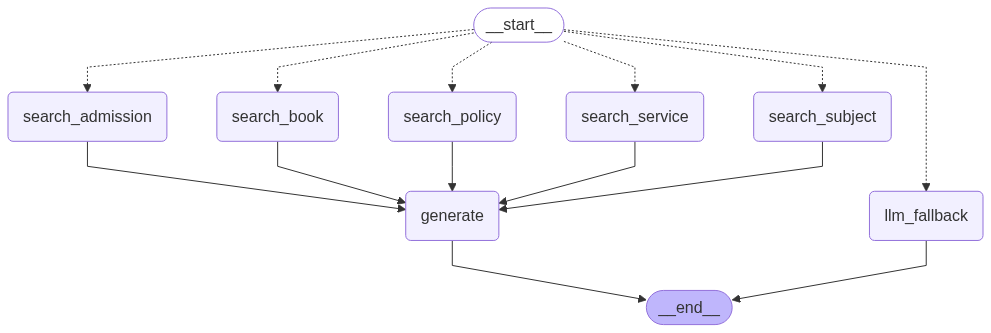

In [19]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 구성
builder = StateGraph(AdaptiveRagState)

# 노드 추가
builder.add_node("search_policy", search_policy_adaptive)
builder.add_node("search_subject", search_subject_adaptive)
builder.add_node("search_admission", search_admission_adaptive)
builder.add_node("search_book", search_book_adaptive)
builder.add_node("search_service", search_service_adaptive)

# 생성 & fallback 노드
builder.add_node("generate", generate_adaptive)
builder.add_node("llm_fallback", llm_fallback_adaptive)

# 조건부 라우팅 추가
builder.add_conditional_edges(
    START,
    route_question_adaptive
)

# 각 검색 → generate 연결
builder.add_edge("search_policy", "generate")
builder.add_edge("search_subject", "generate")
builder.add_edge("search_admission", "generate")
builder.add_edge("search_book", "generate")
builder.add_edge("search_service", "generate")

# generate → END
builder.add_edge("generate", END)

# fallback → END
builder.add_edge("llm_fallback", END)

# 그래프 컴파일
adaptive_rag = builder.compile()

# 그래프 시각화
display(Image(adaptive_rag.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [20]:
# 그래프 실행
inputs = {"question": "현충일이 언제야?"}
for output in adaptive_rag.stream(inputs):
    for key, value in output.items():
        print(f"Node '{key}':")
        print(f"State '{value.keys()}':")
        print(f"Value '{value}':")
    print("\n---\n")

# 최종 답변
print(value["generation"])

C:\Users\82106\AppData\Local\Temp\ipykernel_26708\4078414276.py:17: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output = tool_map[tool_name](question)  # 여기에 실제 검색 결과가 담김


Node 'llm_fallback':
State 'dict_keys(['generation'])':
Value '{'generation': '현충일은 매년 6월 6일입니다. 이 날은 한국에서 전사자와 순국선열을 기리기 위한 날로, 국가적으로 기념됩니다. 추가적인 질문이 있으시면 말씀해 주세요!'}':

---

현충일은 매년 6월 6일입니다. 이 날은 한국에서 전사자와 순국선열을 기리기 위한 날로, 국가적으로 기념됩니다. 추가적인 질문이 있으시면 말씀해 주세요!


In [21]:
# 그래프 실행
inputs = {"question": "경영학과에 어울리는 도서 추천 해줘"}
for output in adaptive_rag.stream(inputs):
    for key, value in output.items():
        print(f"Node '{key}':")
        print(f"State '{value.keys()}':")
        print(f"Value '{value}':")
    print("\n---\n")

# 최종 답변
print(value["generation"])

Node 'llm_fallback':
State 'dict_keys(['generation'])':
Value '{'generation': '관련된 문서를 찾을 수 없습니다.'}':

---

관련된 문서를 찾을 수 없습니다.


## 00. 프로젝트 목적

- 본 프로젝트는 Adaptive RAG를 위한 프로젝트입니다.

-  프로젝트 설명

- 고교학점제 전용 챗봇이라는 큰 틀을 먼저 잡고, 그 아래 세부 카테고리를 재정의
    - 운영 문의: 제도, 졸업 요건, 교과 이수 기준 등
    - 과목 선택: 계열/진로 관련 과목, 이수 단위 관련 질문
    - 입시 연계: 대입, 학과, 진학에 유리한 과목 조합 등
    - 도서/자료 추천: 진로에 맞는 책이나 자료
    - 서비스 이용 문의: 챗봇 사용법, 시스템 오류 등

### 필요한 환경변수 정의

In [ ]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv
import os

# API 키 정보 로드
load_dotenv()

# API 키 읽어오기
openai_api_key = os.environ.get('OPENAI_API_KEY')
pinecone_api_key = os.environ.get("PINECONE_API_KEY")

## 01. Tool 정의

In [ ]:
from langchain_pinecone import PineconeVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document
from langchain_community.tools import TavilySearchResults
from langchain_core.tools import tool
from typing import List

c:\Users\82106\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# OpenAI 임베딩 인스턴스 생성
embeddings = OpenAIEmbeddings(
    model='text-embedding-3-large',
    openai_api_key=openai_api_key
)

In [ ]:
# 운영 문의 정보 검색
pinecone_policy = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="policy", # 네임스페이스 설정 : 운영 문의 -> policy
)

# 운영 정보 검색 tool 정의
@tool
def search_policy(query: str) -> List[Document]:
    """
    Securely search and access operational information related to the High School Credit System,
    including graduation requirements, academic regulations, subject completion standards, and general policy guidelines.

    To maintain data integrity and clarity, use this tool only for questions about system operations of the High School Credit System,
    such as curriculum rules, credit units, or graduation criteria.
    """
    docs = pinecone_policy.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [ ]:
# 과목 정보 검색
pinecone_subject = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="subject", # 네임스페이스 설정: 과목 문의 -> subject
)

# 과목 점보 검색 tool 정의
@tool
def search_subject(query: str) -> List[Document]:
    """
    Securely search and access information about subject within the High School Credit System,  
    including subject descriptions, learning objectives, curriculum content, and their relevance to specific career paths.

    To ensure appropriate guidance, use this tool only for questions related to subject within the High School Credit System
    """
    docs = pinecone_subject.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [ ]:
# 입시 정보 검색
pinecone_admission = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="admission", # 네임스페이스 설정: 과목 문의 -> subject
)

# 입시 점보 검색 tool 정의
@tool
def search_admission(query: str) -> List[Document]:
    """
    Securely search and access information related to college admissions in the context of the High School Credit System,  
    including university overviews, academic majors, academic tracks (계열), and admission procedures.

    To maintain clarity and relevance, use this tool only for questions about college and major selection,  
    such as introductions to specific universities, departments, or entrance examination methods.
    """

    docs = pinecone_admission.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [ ]:
# 도서 정보 검색
pinecone_book = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="book", # 네임스페이스 설정: 과목 문의 -> subject
)

# 도서 추천 검색 tool 정의
@tool
def search_book(query: str) -> List[Document]:
    """
    Search and access book recommendations tailored to specific majors or academic tracks,  
    along with brief summaries for each recommended title.

    Use this tool only for questions about books related to a student’s interests or field of study.
    """

    docs = pinecone_book.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [ ]:
# 서비스 관련 정보 검색
pinecone_service = PineconeVectorStore.from_documents(
    documents=[], # 빈 리스트로 초기화
    index_name="mypolio-curriculums",   # 인덱스 이름
    embedding=embeddings,               # 임베딩 인스턴스
    pinecone_api_key=pinecone_api_key,
    namespace="service", # 네임스페이스 설정: 고교학점제 -> curriculum, 진로&진학 상담 -> course, 서비스 문의 -> service
)

# 서비스 검색
@tool
def search_service(query: str) -> List[str]:
    """
    Securely search and access service-related information for the Myfolio service-related information,  
    including how to use the chatbot and how to resolve issues related to the Myfolio service.

    Use this tool only for service-related queries, such as usage instructions or customer support requests.
    """

    docs = pinecone_service.similarity_search(query, k=2)
    if len(docs) > 0:
        return docs
    
    return [Document(page_content="관련 정보를 찾을 수 없습니다.")]

In [ ]:
# 도구 목록을 정의 
tools = [search_policy, search_subject, search_admission, search_book, search_service]

In [ ]:
from langchain_openai import ChatOpenAI
from pprint import pprint

# 기본 LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, streaming=True)

# LLM에 도구 바인딩하여 추가 
llm_with_tools = llm.bind_tools(tools)

In [ ]:
# 메뉴 검색에 관련된 질문을 하는 경우 -> 메뉴 검색 도구를 호출  
query = "고교학점제 졸업요건에 대해 설명해줘"
ai_msg = llm_with_tools.invoke(query)

pprint(ai_msg)
print("-" * 100)

pprint(ai_msg.content)
print("-" * 100)

pprint(ai_msg.tool_calls)
print("-" * 100)

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_L0EUU8tvEY4wcL8uN0uaNbXo', 'function': {'arguments': '{"query":"고교학점제 졸업요건"}', 'name': 'search_policy'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_92e0377081'}, id='run--698bd398-6fc3-4bbd-a2b9-8304c3116132-0', tool_calls=[{'name': 'search_policy', 'args': {'query': '고교학점제 졸업요건'}, 'id': 'call_L0EUU8tvEY4wcL8uN0uaNbXo', 'type': 'tool_call'}])
----------------------------------------------------------------------------------------------------
''
----------------------------------------------------------------------------------------------------
[{'args': {'query': '고교학점제 졸업요건'},
  'id': 'call_L0EUU8tvEY4wcL8uN0uaNbXo',
  'name': 'search_policy',
  'type': 'tool_call'}]
----------------------------------------------------------------------------------------------------


## 02. State 정의

In [ ]:
from typing import TypedDict, List
from langchain_core.documents import Document

# 상태 Schema 정의 
class AdaptiveRagState(TypedDict):
    question: str
    documents: List[Document]
    generation: str

## 03. 질문 분석 후 라우팅

In [ ]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field
from textwrap import dedent

# 라우팅 결정용 데이터 모델
class ToolSelector(BaseModel):
    """Routes the user question to the most appropriate tool."""
    tool: Literal[
        "search_policy", 
        "search_subject", 
        "search_admission", 
        "search_book", 
        "search_service"
    ] = Field(
        description="Select one of the tools: search_policy, search_subject, search_admission, search_books, or search_service based on the user's question."
    )

# 구조화된 출력을 위한 LLM 설정
structured_llm = llm.with_structured_output(ToolSelector)

# 라우팅을 위한 프롬프트 템플릿
system = dedent("""You are a high school curriculum chatbot that classifies user questions into one of five categories.

Use the following routing rules:
- For questions about 고교학점제 운영, graduation requirements, or subject completion standards, use the **search_policy** tool.
- For questions about 과목 정보, 학습 내용, or recommended subjects for careers, use the **search_subject** tool.
- For questions about 대학/전공/계열 소개 or 입학 전형, use the **search_admission** tool.
- For questions requesting 전공/계열 관련 도서 추천 or brief summaries of specific books, use the **search_book** tool.
- For questions about how to use the chatbot or MyPolio service issues, use the **search_service** tool.

Always select the most appropriate tool based on the user's intent.
""")

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

# 질문 라우터 정의
question_router = route_prompt | structured_llm

# 테스트 실행
print(question_router.invoke({"question": "고교학점제 졸업 요건에 대해 설명해줘"}))
print(question_router.invoke({"question": "경영학과 가고 싶은데, 어떤 과목을 들어야 하나요?"}))
print(question_router.invoke({"question": "서울대학교 경영학과에 대해 알려줘."}))
print(question_router.invoke({"question": "경영학과에 도움되는 도서 추천해줘."}))
print(question_router.invoke({"question": "베어러블의 세특 추천 서비스 이용 방법이 궁금해요."}))

tool='search_policy'
tool='search_subject'
tool='search_admission'
tool='search_book'
tool='search_service'


In [ ]:
def route_question_adaptive(state: AdaptiveRagState) -> Literal[
    "search_policy", "search_subject", "search_admission", "search_book", "search_service", "llm_fallback"
]:
    question = state["question"]
    try:
        result = run_tool_and_get_output(question)
        datasource = result["tool"]
        output = result["output"]

        # output이 문서 리스트고, 전부 '관련 정보를 찾을 수 없습니다'이면 fallback
        if isinstance(output, list):
            all_pages = [doc.page_content for doc in output]
            if all("관련 정보를 찾을 수 없습니다" in page for page in all_pages):
                return "llm_fallback"

        return datasource if datasource in tool_map else "llm_fallback"

    except Exception as e:
        print(f"Error in routing: {str(e)}")
        return "llm_fallback"

## 04. 검색 노드 설정

In [ ]:
def search_policy_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the 고교학점제 운영
    """
    question = state["question"]
    docs = search_policy.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 고교학점제 운영 정보를 찾을 수 없습니다.")]}


def search_subject_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the subject whthin the 고교학점제
    """
    question = state["question"]
    docs = search_subject.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 과목 정보를 찾을 수 없습니다.")]}

def search_admission_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the admission
    """
    question = state["question"]
    docs = search_admission.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 입시 정보를 찾을 수 없습니다.")]}

def search_book_adaptive(state: AdaptiveRagState):
    """
    Node for searching information in the book
    """
    question = state["question"]
    docs = search_book.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 도서 정보를 찾을 수 없습니다.")]}


def search_service_adaptive(state: AdaptiveRagState):
    """
    Node for searching the 베어러블 service information
    """
    question = state["question"]
    docs = search_service.invoke(question)
    if len(docs) > 0:
        return {"documents": docs}
    else:
        return {"documents": [Document(page_content="관련 베어러블 서비스 정보를 찾을 수 없습니다.")]}

## 05. 생성노드

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# RAG 프롬프트 정의
rag_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an assistant answering questions based on provided documents. Follow these guidelines:

1. Use only information from the given documents.
2. If the document lacks relevant info, say "The provided documents don't contain information to answer this question."
3. Cite relevant parts of the document in your answers.
4. Don't speculate or add information not in the documents.
5. Keep answers concise and clear.
6. Omit irrelevant information.
7. 관련된 문서가 없을 경우, 
   "The provided documents don't contain information to answer this question."라고 답변해줘."""
),
    ("human", "Answer the following question using these documents:\n\n[Documents]\n{documents}\n\n[Question]\n{question}"),
])

def generate_adaptive(state: AdaptiveRagState):
    """
    Generate answer using the retrieved_documents
    """
    question = state.get("question", None)
    documents = state.get("documents", [])
    if not isinstance(documents, list):
        documents = [documents]

    # 문서 내용을 문자열로 변환
    documents_text = "\n\n".join([f"---\n본문: {doc.page_content}\n메타데이터:{str(doc.metadata)}\n---" for doc in documents])

    # RAG generation
    rag_chain = rag_prompt | llm | StrOutputParser()
    generation = rag_chain.invoke({"documents": documents_text, "question": question})
    return {"generation": generation}

In [ ]:
# LLM Fallback 프롬프트 정의
fallback_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are an AI assistant helping with various topics. Follow these guidelines:

There are two possible situations:

1. If the {question} is relevant to topics like school policies, curriculum, admissions, book, or services 등 학교에 관련된 정보,
    respond by clearly stating: "관련된 문서를 찾을 수 없습니다."

2. If the question is unrelated to those topics (e.g., public holidays, general culture, history, daily life),
   simply answer it using your general knowledge.

In all cases:
- Provide accurate and helpful information to the best of your ability.
- Express uncertainty when unsure; avoid speculation.
- Keep answers concise yet informative.
- Inform users they can ask for clarification if needed.
- Respond ethically and constructively.
- Mention reliable general sources when applicable if needed.
"""),
    ("human", "{question}"),
])

def llm_fallback_adaptive(state: AdaptiveRagState):
    """
    Generate answer using the LLM without context
    """
    question = state.get("question", "")
    
    # LLM chain
    llm_chain = fallback_prompt | llm | StrOutputParser()
    
    generation = llm_chain.invoke({"question": question})
    return {"generation": generation}

## 06. 그래프 연결

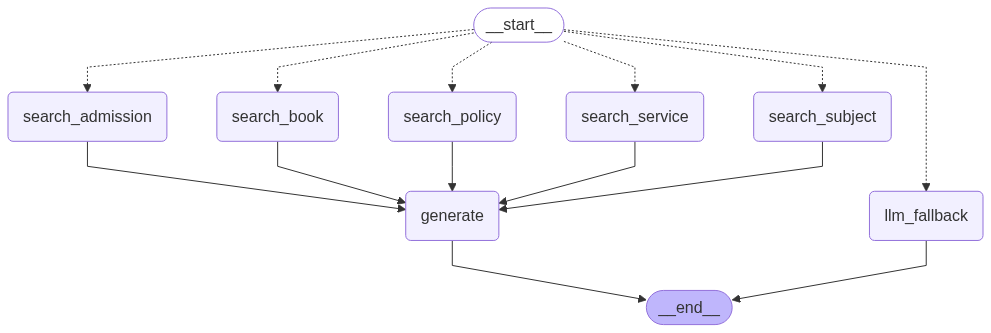

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 그래프 구성
builder = StateGraph(AdaptiveRagState)

# 노드 추가
builder.add_node("search_policy", search_policy_adaptive)
builder.add_node("search_subject", search_subject_adaptive)
builder.add_node("search_admission", search_admission_adaptive)
builder.add_node("search_book", search_book_adaptive)
builder.add_node("search_service", search_service_adaptive)

# 생성 & fallback 노드
builder.add_node("generate", generate_adaptive)
builder.add_node("llm_fallback", llm_fallback_adaptive)

# 조건부 라우팅 추가
builder.add_conditional_edges(
    START,
    route_question_adaptive
)

# 각 검색 → generate 연결
builder.add_edge("search_policy", "generate")
builder.add_edge("search_subject", "generate")
builder.add_edge("search_admission", "generate")
builder.add_edge("search_book", "generate")
builder.add_edge("search_service", "generate")

# generate → END
builder.add_edge("generate", END)

# fallback → END
builder.add_edge("llm_fallback", END)

# 그래프 컴파일
adaptive_rag = builder.compile()

# 그래프 시각화
display(Image(adaptive_rag.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [ ]:
# 그래프 실행
inputs = {"question": "현충일이 언제야?"}
for output in adaptive_rag.stream(inputs):
    for key, value in output.items():
        print(f"Node '{key}':")
        print(f"State '{value.keys()}':")
        print(f"Value '{value}':")
    print("\n---\n")

# 최종 답변
print(value["generation"])

C:\Users\82106\AppData\Local\Temp\ipykernel_26708\4078414276.py:17: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  output = tool_map[tool_name](question)  # 여기에 실제 검색 결과가 담김


Node 'llm_fallback':
State 'dict_keys(['generation'])':
Value '{'generation': '현충일은 매년 6월 6일입니다. 이 날은 한국에서 전사자와 순국선열을 기리기 위한 날로, 국가적으로 기념됩니다. 추가적인 질문이 있으시면 말씀해 주세요!'}':

---

현충일은 매년 6월 6일입니다. 이 날은 한국에서 전사자와 순국선열을 기리기 위한 날로, 국가적으로 기념됩니다. 추가적인 질문이 있으시면 말씀해 주세요!
